# Lab 3

In [71]:
import pandas as pd
import numpy as np
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [72]:
training = pd.read_csv('data/train.csv')
testing = pd.read_csv('data/test.csv')

training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [73]:
training["Gender"] = training["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1)

training['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [74]:

training["Age"].fillna(training["Age"].mean(), inplace=True)

training[training['Age'].isna()].shape[0]

0

Mean value of the whole `Age` column was used to fill the missing ages.

In [75]:
y_target = training["Survived"].values
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[columns].values


In [76]:
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

clf_train.score(X_input, y_target)


0.8163934426229508

In [77]:
from six import StringIO
with open("./data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)


In [78]:
!dot -Tpng ./data/titanic.dot -o ./data/titanic.png

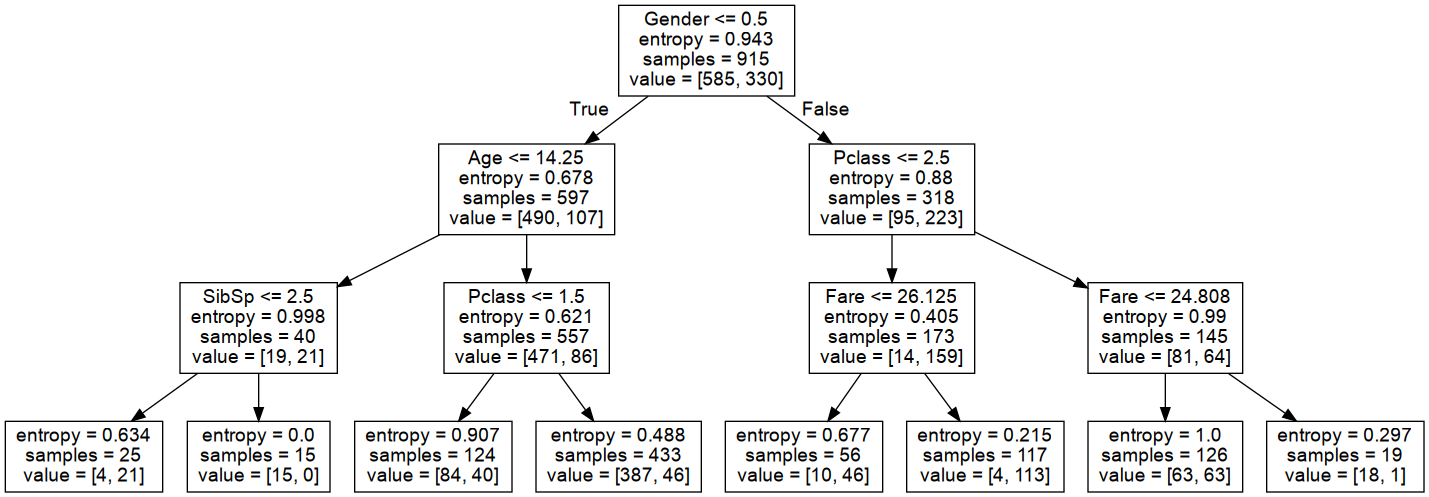

In [79]:
from IPython.display import Image

Image("./data/titanic.png")

The group that had the most deaths can be described as "Men older than 14 year old in 2nd or 3rd classes"

The group that had the most survivors is "Women in 2nd or 1st class who paid more than 26.125 pounds for a ticket"

In [80]:
print(f'There are {testing.shape[0]} records in the data set')

There are 393 records in the data set


In [81]:
testing.isna().sum().sort_values(ascending=False)

Cabin          300
Age             86
Embarked         1
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [82]:
testing["Gender"] = testing["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1)

testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing.info()
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    int64  
 5   Age          393 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 37.0+ KB


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [83]:
X_input = testing[list(columns)].values
target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame(
    {'Est_Survival': target_labels, 'Name': testing['Name']})

target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [84]:
all_data = pd.read_csv("./data/all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(
    target_labels, all_data[['Name', 'Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] ==
             testing_results['Survived']) / float(len(testing_results))

acc

0.7588832487309645

In [85]:
all_data = pd.read_csv("./data/all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
print(f'There are {all_data.shape[0]} records in the data set')
all_data.isna().sum().sort_values(ascending=False)

There are 1308 records in the data set


Age         263
Survived      0
Pclass        0
Gender        0
SibSp         0
Fare          0
dtype: int64

In [86]:

all_data["Gender"] = all_data["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1)

all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [87]:
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=0)


In [88]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))

#output the values in a test string
print('Training score = ' + train_score+' Testing score = '+test_score)


Training score = 0.8201530612244898 Testing score = 0.8053435114503816
